In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from google.colab.patches import cv2_imshow
from sklearn.cluster import SpectralClustering, KMeans


In [ ]:
originalImage = cv2.imread('raj.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

#cv2_imshow(blackAndWhiteImage)
#cv2_imshow(originalImage)
#cv2_imshow(grayImage)

rows = len(blackAndWhiteImage)
cols = len(blackAndWhiteImage[0])

print(rows,cols)

lst = []
for i in range(0,887,2):
  for j in range(0,1576,2):
    if blackAndWhiteImage[i][j] == 0:
      lst.append([j,-i])

print(lst)
len(lst)

888 1577
[[850, -156], [852, -156], [854, -156], [856, -156], [858, -156], [860, -156], [862, -156], [864, -156], [866, -156], [868, -156], [870, -156], [872, -156], [874, -156], [876, -156], [878, -156], [880, -156], [882, -156], [884, -156], [886, -156], [888, -156], [890, -156], [892, -156], [840, -158], [842, -158], [844, -158], [846, -158], [848, -158], [850, -158], [852, -158], [854, -158], [856, -158], [858, -158], [860, -158], [862, -158], [864, -158], [866, -158], [868, -158], [870, -158], [872, -158], [874, -158], [876, -158], [878, -158], [880, -158], [882, -158], [884, -158], [886, -158], [888, -158], [890, -158], [892, -158], [894, -158], [896, -158], [898, -158], [900, -158], [902, -158], [904, -158], [538, -160], [540, -160], [542, -160], [544, -160], [546, -160], [830, -160], [832, -160], [834, -160], [836, -160], [838, -160], [840, -160], [842, -160], [844, -160], [846, -160], [848, -160], [850, -160], [894, -160], [896, -160], [898, -160], [900, -160], [902, -160], [9

2246

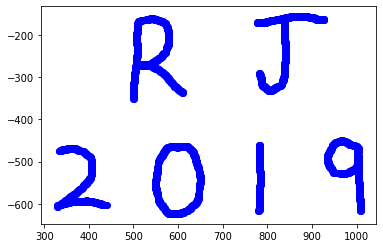

In [ ]:
plt.scatter(*zip(*lst), color = 'blue')
#plt.xlabel('Weight')
#plt.ylabel('Height')

In [ ]:
X = np.array(lst)
W = pairwise_distances(X, metric="euclidean")

#vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
#W = np.vectorize(vectorizer)(W)
th = 4
for i in range(W.shape[0]):
  for j in range(W.shape[1]):
    if i==j:
      W[i][j]=0
    elif W[i][j]< th:
      W[i][j]=1
    else:
      W[i][j]=0

print(W)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# degree matrix
D = np.diag(np.sum(W, axis=1).tolist())
print('degree matrix:')
print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 4.]]
laplacian matrix:
[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  5. -1. ...  0.  0.  0.]
 [ 0. -1.  5. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5. -1.  0.]
 [ 0.  0.  0. ... -1.  5. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]


In [ ]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-4.87210088e-15 -2.11400993e-15 -6.17736973e-16 ...  1.03314934e+01
  1.03360151e+01  1.07708018e+01]
eigenvectors:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.52307016e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.17640990e-17  0.00000000e+00]
 ...
 [-1.25861385e-02 -2.23600278e-02 -3.05360570e-02 ... -3.11738911e-43
   0.00000000e+00 -1.87805767e-45]
 [-1.25861385e-02 -2.23600278e-02 -3.05360570e-02 ... -1.97283994e-43
   0.00000000e+00 -1.21573584e-45]
 [-1.25861385e-02 -2.23600278e-02 -3.05360570e-02 ... -1.11163015e-43
   0.00000000e+00 -6.94132043e-46]]


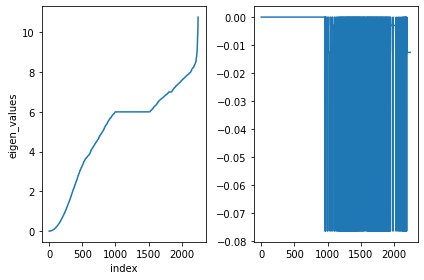

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
#ax1.title.set_text('eigenvalues')
plt.xlabel('index')
plt.ylabel('eigen_values')
i = np.where(e < 10e-15)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [ ]:
# we use k-means to classify the nodes based off their corresponding values in the eigenvector.

k=6
Q = np.zeros((len(lst),k))
for i in range(len(lst)):
  for j in range(k):
    Q[i][j] = v[i][j]


In [ ]:
import random
means = np.zeros((k,k))
for i in range(k):
    means[i] = Q[random.randint(0,len(lst))]
print(means)

[[ 4.96903995e-02  6.69779414e-19  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.96903995e-02  8.30350409e-18  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.41510786e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.96903995e-02 -4.81019438e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.96903995e-02 -2.82739126e-18  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.18398016e-05 -1.18185613e-17
  -4.72455576e-02  0.00000000e+00]]


In [ ]:
def dist(p1 ,p2 ,dimension):
  res = 0;
  for i in range(dimension):
    res += (p1[i]-p2[i])**2
  return res

In [ ]:
clusters = np.zeros(len(lst))
group = np.zeros(k)
flag = False
iteration = 0

while(flag==False):
  
  iteration += 1
  newmean = np.zeros((k,k))
  countmean = np.zeros(k)

  for i in range(len(lst)):
    for j in range(k):
      group[j] = dist(Q[i],means[j],k)
    index = 0
    for j in range(k):
      if(group[j]<group[index]):
        index = j
    clusters[i] = index
    newmean[index]+=Q[i]
    countmean[index]+=1

  newmean = (newmean.transpose()/countmean).transpose()
  comparison = newmean == means
  flag = comparison.all()
  means = newmean
  if(iteration>5000):
    flag = True

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# implementing spectral clusterings
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
cluster6=[]
#cluster7=[]
cc1=0
cc2=0
cc3=0
cc4=0
cc5=0
cc6=0
#cc7=0
c=0
for i in clusters:
  if(i==0):
    cluster1.insert(cc1,lst[c])
    cc1+=1
  if(i==1):
    cluster2.insert(cc2,lst[c])
    cc2+=1
  if(i==2):
    cluster3.insert(cc3,lst[c])
    cc3+=1
  if(i==3):
    cluster4.insert(cc4,lst[c])
    cc4+=1
  if(i==4):
    cluster5.insert(cc5,lst[c])
    cc5+=1
  if(i==5):
    cluster6.insert(cc6,lst[c])
    cc6+=1
  # if(i==6):
  #   cluster7.insert(cc7,lst[c])
  #   cc7+=1
  c+=1

In [ ]:
print(c,cc1,cc2,cc3,cc4,cc5,cc6)

2246 405 345 513 448 376 159


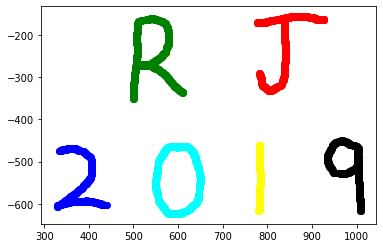

In [ ]:
plt.scatter(*zip(*cluster1), color = 'red')
plt.scatter(*zip(*cluster2), color = 'blue')
plt.scatter(*zip(*cluster3), color = 'green')
plt.scatter(*zip(*cluster4), color = 'cyan')
plt.scatter(*zip(*cluster5), color = 'black')
plt.scatter(*zip(*cluster6), color = 'yellow')
#plt.scatter(*zip(*cluster7), color = 'brown')